# How to generate interaction networks for swarms of ellipses

In [1]:
import ellipse_swarm as esw
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ContagionNetworks as cc

Inside ellipse_swarm.py there is a class called Swarm which can 
- generate spatial configurations, 
- calculate the visual field of each individual, 
- calculate the binary interaction networks (visual, metric, topological)
- do some plotting. 

## 1. Initialize a swarm

In [2]:
mySwarm=esw.Swarm(N=9) # N is the number of individuals in the swarm

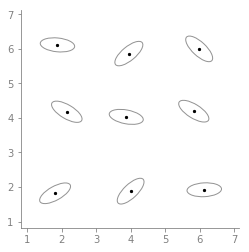

In [3]:
# you can plot the ellipses via
mySwarm.plot_ellipses()

### 1.1. Ellipse properties:

Ellipses always have a length of one and one eye.

Define the following ellipse properties when you create the swarm:
- width given by parameter w, i.e. w=1 is a circle, default is 0.3 (0<w<=1)
- position of the eye (black dot) is given by parameter l, l=-1 is the back, l=1 the front, l=0 the center (default)

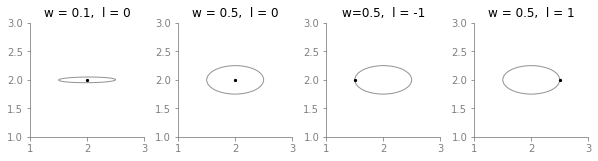

In [4]:
fig,ax=plt.subplots(1,4)
swarm=esw.Swarm(N=1,w=0.1,l=0,noise_phi=10000,noise_pos=0)
swarm.plot_ellipses(ax=ax[0])
ax[0].set_title('w = 0.1,  l = 0')

swarm=esw.Swarm(N=1,w=0.5,l=0,noise_phi=10000,noise_pos=0)
swarm.plot_ellipses(ax=ax[1])
ax[1].set_title('w = 0.5,  l = 0')

swarm=esw.Swarm(N=1,w=0.5,l=-1,noise_phi=10000,noise_pos=0)
swarm.plot_ellipses(ax=ax[2])
ax[2].set_title('w=0.5,  l = -1')

swarm=esw.Swarm(N=1,w=0.5,l=1,noise_phi=10000,noise_pos=0)
swarm.plot_ellipses(ax=ax[3])
ax[3].set_title('w = 0.5,  l = 1')

fig.set_size_inches(10,3)
plt.subplots_adjust(wspace=0.3)

### 1.2. Spatial configuration

You can generate positions and orientations by specifying the following when initializing a swarm:
- N (number of indidivuals)
- setup ('grid' or 'milling' or 'hexagonal')
- dist (average distance between individuals positions)
- noise_pos (noise added to individuals positions)
- noise_phi (noise added to individuals orientations)

Let's illustrate the three setups (black, without added noise, red with noise):

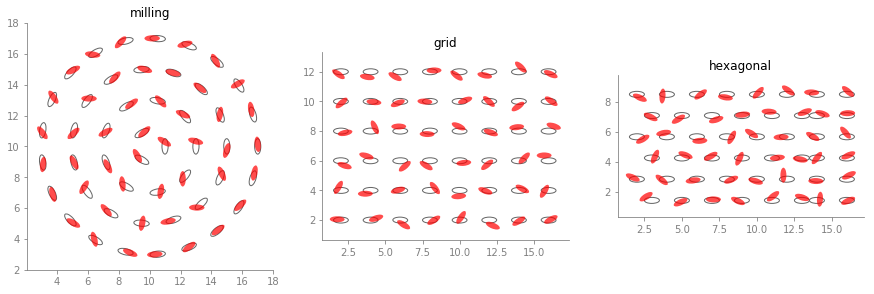

In [5]:
fig,ax=plt.subplots(1,3)
#create the swarm without noise and plot it
test_swarm=esw.Swarm(N=48,setup='milling',dist=2,noise_pos=0,noise_phi=10000)
test_swarm.plot_ellipses(ax=ax[0],show_eyes=False,alpha=1)
#create the swarm with noise and plot it
test_swarm=esw.Swarm(N=48,setup='milling',dist=2,noise_pos=0.2,noise_phi=3)
test_swarm.plot_ellipses(ax=ax[0],show_eyes=False,color='r',edgecolor='none')

a=ax[0].set_title('milling')

#create the swarm without noise and plot it
test_swarm=esw.Swarm(N=48,setup='grid',dist=2,noise_pos=0,noise_phi=10000)
test_swarm.plot_ellipses(ax=ax[1],show_eyes=False,alpha=1)
#create the swarm with noise and plot it
test_swarm=esw.Swarm(N=48,setup='grid',dist=2,noise_pos=0.2,noise_phi=3)
test_swarm.plot_ellipses(ax=ax[1],show_eyes=False,color='r',edgecolor='none')

a=ax[1].set_title('grid')

#create the swarm without noise and plot it
test_swarm=esw.Swarm(N=48,setup='hexagonal',dist=2,noise_pos=0,noise_phi=10000)
test_swarm.plot_ellipses(ax=ax[2],show_eyes=False,alpha=1)
#create the swarm with noise and plot it
test_swarm=esw.Swarm(N=48,setup='hexagonal',dist=2,noise_pos=0.2,noise_phi=3)
test_swarm.plot_ellipses(ax=ax[2],show_eyes=False,color='r',edgecolor='none')

a=ax[2].set_title('hexagonal')
fig.set_size_inches(15,10)

You can also read in positions and orientations of the ellipses via giving
- either of these two:
    - pos (position of the eye of the ellipses) (Nx2 or 2xN array, does not matter which)
    - pos_center (position of the center of the ellipses)
- and phi (orientations in radians)
at initialization or update them using swarm.set_pos_orient(pos,phi)

## 2. How to generate a visual, metric & topological network with a specific threshold

The Swarm class has a function for the generation of each network type (see below). Each has the option to either return only the adjacency matrix or to additionally return a networkX DiGraph, which can be used for plotting the network or to obtain network measures.

In [6]:
mySwarm=esw.Swarm(N=9)

/home/poelwinn/gitrepos/visual_networks_code_for_publication/ellipse_swarm.py:728: RuntimeWarning: invalid value encountered in sqrt
  t=(np.array([(-ee-np.sqrt(determinant))/(2.*dd),
/home/poelwinn/gitrepos/visual_networks_code_for_publication/ellipse_swarm.py:729: RuntimeWarning: invalid value encountered in sqrt
  (-ee+np.sqrt(determinant))/(2.*dd)]))
/home/poelwinn/gitrepos/visual_networks_code_for_publication/ellipse_swarm.py:730: RuntimeWarning: invalid value encountered in greater
  mask=np.array(t>0.,dtype=float)


[[0 1 0 1 1 1 0 1 1]
 [1 0 1 1 1 1 1 0 1]
 [0 1 0 1 1 1 0 1 0]
 [1 1 1 0 1 0 1 1 1]
 [1 1 1 1 0 1 1 1 1]
 [1 1 1 0 1 0 1 1 1]
 [0 1 0 1 1 1 0 1 1]
 [1 0 1 1 1 1 1 0 1]
 [1 1 0 1 1 1 0 1 0]]


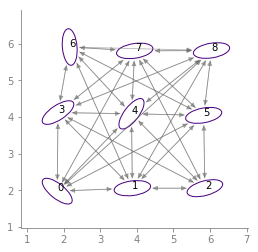

In [7]:
visual_amat,visual_network=mySwarm.binary_visual_network(threshold=0.02,return_networkX=True)
print(np.matrix(visual_amat))
fig,ax=plt.subplots(1)
mySwarm.draw_binary_network(visual_network,fig=fig,ax=ax,ellipse_edgecolor='indigo',show_index=True)

[[0 1 0 1 1 0 0 0 0]
 [1 0 1 1 1 1 0 0 0]
 [0 1 0 0 1 1 0 0 0]
 [1 1 0 0 1 0 1 1 0]
 [1 1 1 1 0 1 1 1 1]
 [0 1 1 0 1 0 0 1 1]
 [0 0 0 1 1 0 0 1 0]
 [0 0 0 1 1 1 1 0 1]
 [0 0 0 0 1 1 0 1 0]]


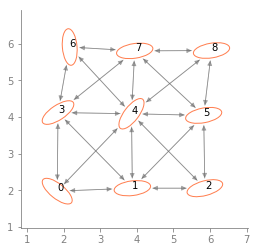

In [8]:
metric_amat,metric_network=mySwarm.binary_metric_network(threshold=3,return_networkX=True)
print(np.matrix(metric_amat))
fig,ax=plt.subplots(1)
mySwarm.draw_binary_network(metric_network,fig=fig,ax=ax,ellipse_edgecolor='coral',show_index=True)

[[0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 0 0 0]]


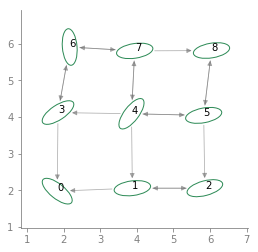

In [9]:
topological_amat,topological_network=mySwarm.binary_topological_network(threshold=2,return_networkX=True)
print(np.matrix(topological_amat))
fig,ax=plt.subplots(1)
mySwarm.draw_binary_network(topological_network,fig=fig,ax=ax,ellipse_edgecolor='seagreen',show_index=True)

## 3. Requirements for the high density regime (overlap elimination)

If the initially generated positions contain overlaps, these are eliminated via _eliminate_overlaps() (this happens automatically if they are detected at initialization with eliminate_overlaps=True, which is default)
The overlap elimination uses code derived from Palachanis et. Al (https://link.springer.com/article/10.1007/s40571-015-0064-5). See the readme within that publication for instructions on how to install the necessary packages.

moving ellipses to get rid of intersections


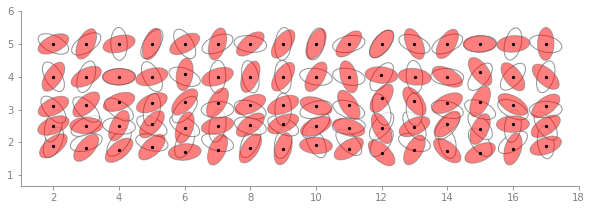

In [10]:
x=np.arange(2,18,1,dtype=float)
y=np.array([2.,2.5,3,4,5])
pos=np.array([[a,b] for a in x for b in y])
phi=np.random.random(len(x)*len(y))*2.*np.pi
# initialize swarm with above (overlapping) positions (pos) and orientations (phi)
mySwarm=esw.Swarm(pos=pos,phi=phi,w=0.5,eliminate_overlaps=False)
# plot the swarm with intersecting ellipses (black line)
mySwarm.plot_ellipses(show_eyes=False)
# remove the intersections and replot (in red)
mySwarm=esw.Swarm(pos=pos,phi=phi,w=0.5,eliminate_overlaps=True)
mySwarm.plot_ellipses(alpha=0.5,color='r')
plt.gcf().set_size_inches(10,10)

## 4. Example of how to use the code to generate Figures 1 to 3 from the Paper

Here, we generate a low resolution version of the plot in Figure 1C) (average in-degree vs. density) for a smaller group size (N=36) and only one threshold value for each network type

moving ellipses to get rid of intersections
moving ellipses to get rid of intersections
moving ellipses to get rid of intersections
moving ellipses to get rid of intersections


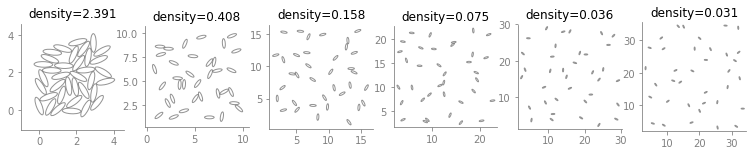

In [27]:
visual_threshold=0.05
metric_threshold=3
topological_threshold=3
distances=np.arange(0.5,5.6,1)
                    
density=[]
avg_indegree_visual=[]
avg_indegree_metric=[]
avg_indegree_topological=[]

#Let's also plot the spatial configurations we create
fig,ax=plt.subplots(1,len(distances))

for i,dist in enumerate(distances):
    swarm=esw.Swarm(N=36,noise_pos=0.5,noise_phi=0.1,w=0.3,dist=dist)
    visual_amat=swarm.binary_visual_network(threshold=visual_threshold)
    metric_amat=swarm.binary_metric_network(threshold=metric_threshold)
    topological_amat=swarm.binary_topological_network(threshold=topological_threshold)
    this_density=swarm.density()
    density.append(this_density)
    avg_indegree_visual.append(np.mean(np.sum(visual_amat,axis=0)))
    avg_indegree_metric.append(np.mean(np.sum(metric_amat,axis=0)))
    avg_indegree_topological.append(np.mean(np.sum(topological_amat,axis=0)))
    # this is just plotting the swarm, not necessary to create the Figure 1C plot
    swarm.plot_ellipses(ax=ax[i],show_eyes=False)
    ax[i].set_title('density=%1.3f'%this_density)
    
fig.set_size_inches(13,4)

Text(0.5, 0, 'density [BL$^2$]')

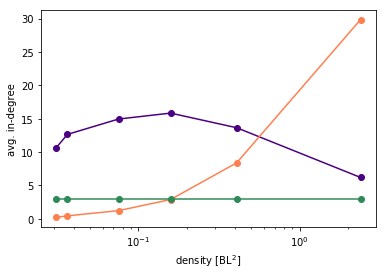

In [30]:
fig,ax=plt.subplots(1)
ax.plot(density,avg_indegree_visual,c='indigo',marker='o')
ax.plot(density,avg_indegree_metric,c='coral',marker='o')
ax.plot(density,avg_indegree_topological,c='seagreen',marker='o')
ax.set_xscale('log')
ax.set_ylabel('avg. in-degree')
ax.set_xlabel('density [BL$^2$]')

### Other network measures

Let's use one metric network to show the calculation of other network measures:

In [23]:
swarm=esw.Swarm(N=36,eliminate_overlaps=False)
adjacency_matrix,network=swarm.binary_metric_network(return_networkX=True)

polarization=swarm.polarization()
avg_shortest_path=nx.average_shortest_path_length(network)
avg_clustering=np.mean(np.array(list(nx.clustering(network).items()))[:,1])
avg_rel_link_length=np.sum(swarm.metric_distance_center*adjacency_matrix)/(np.sum(adjacency_matrix)*np.amax(swarm.metric_distance_center))

In [26]:
print('polarization: %1.4f'%polarization)
print('avgerage shortest path; %1.4f'%avg_shortest_path)
print('average clustering coefficient: %1.4f'%avg_clustering)
print('average relative link length: %1.4f'%avg_rel_link_length)

polarization: 0.1319
avgerage shortest path; 1.7873
average clustering coefficient: 0.7033
average relative link length: 0.2253


## 5. Running contagion dynamics on the networks 

### 5.1. Simple Contagion

Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=2.5500000000000003
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=3.5
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=4.4
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=3.8000000000000003
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=2.6500000000000004
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=2.8000000000000003
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=2.7
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=2.6
Initially infecting pre-set 

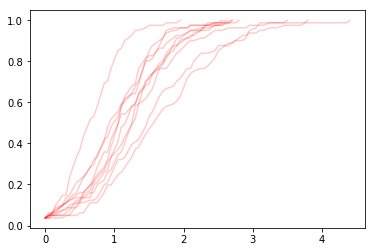

In [39]:
swarm=esw.Swarm(N=81)
adjacency_matrix,network=swarm.binary_metric_network(return_networkX=True,threshold=5)

simtime=100
N=swarm.n
contagion_type='simple'
recovery_rate=0.03
init_infected_nodes=[0,4,5] # ids of initially infected nodes
infection_rate = 0.3
threshold_complexContagion=None
steepness_complexContagion=None

SIR_parameters=cc.InitParameters(simtime=simtime,
                                 N=N,
                                 contagion_type=contagion_type,
                                 recovery_rate=recovery_rate,
                                 init_infected_nodes=init_infected_nodes, 
                                 infection_rate=infection_rate,
                                 threshold_complexContagion=threshold_complexContagion,
                                 steepness_complexContagion=steepness_complexContagion)

# Here we generate 10 cascades and plot the temporal evolution of the activated fraction of individuals
fig,ax=plt.subplots(1)
for i in range(10):
    outdata = cc.SingleRun(SIR_parameters, adjM=adjacency_matrix, pos=swarm.pos.T)
    time=outdata['time']
    activated_fraction=(np.array(outdata['ninf'])+np.array(outdata['nrec']))/swarm.n
    ax.plot(time,activated_fraction,color='r',alpha=0.2)

cc.SingleRun returns a dictionary with the following entries:

- outdata['state'] contains a time series of the state of each node with 1=infected, 0=susceptible, -1=recovered
- outdata['ninf'] number of infected individuals at time t
- outdata['nrec'] number of recovered individuals at time t
- outdata['time'] time t
- outdata['edgelist'] the adjacency matrix as a list of existing network links

From these the time to 75% activation (infected + recovered individuals) is calculated



In [35]:
swarm=esw.Swarm(N=81)
adjacency_matrix,network=swarm.binary_metric_network(return_networkX=True,threshold=5)

simtime=100
N=swarm.n
contagion_type='complex_fractional'
recovery_rate=0.03
init_infected_nodes=[0,4,5] # ids of initially infected nodes
infection_rate = 0.3
threshold_complexContagion=0.3
steepness_complexContagion=10

Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=68.75
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=67.55
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=98.60000000000001
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=16.85
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=55.2
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=15.450000000000001
Initially infecting pre-set nodes: [0, 4, 5]
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=50.1
Initially infecting pre-set nodes: [0, 4, 5]
Done! - no infected or susceptible nodes left - terminating at t=60.8000000

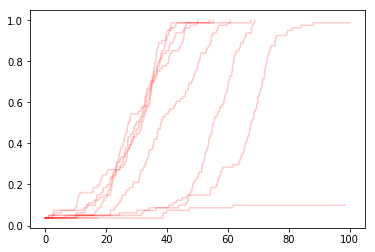

In [38]:
SIR_parameters=cc.InitParameters(simtime=simtime,
                                 N=N,
                                 contagion_type=contagion_type,
                                 recovery_rate=recovery_rate,
                                 init_infected_nodes=init_infected_nodes, 
                                 infection_rate=infection_rate,
                                 threshold_complexContagion=threshold_complexContagion,
                                 steepness_complexContagion=steepness_complexContagion)

# Here we generate 10 cascades and plot the temporal evolution of the activated fraction of individuals
fig,ax=plt.subplots(1)
for i in range(10):
    outdata = cc.SingleRun(SIR_parameters, adjM=adjacency_matrix, pos=swarm.pos.T)
    time=outdata['time']
    activated_fraction=(np.array(outdata['ninf'])+np.array(outdata['nrec']))/swarm.n
    ax.plot(time,activated_fraction,color='r',alpha=0.2)